# divide the study period according to the policy

In [1]:
import pandas as pd
data = pd.read_excel('mobility.xlsx')
data.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,year,...,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,cumCasesBySpecimenDate,cumDeaths28DaysByDeathDate,newCasesBySpecimenDate,newDeaths28DaysByDeathDate,national daily death,national cum death,national daily case,national cum case
0,GB,United Kingdom,West Yorkshire,Leeds District,NaN,GB-LDS,NaN,ChIJYXT0cPtbeUgRUOJs7Z75DAQ,2020-02-15,2020,...,-3.0,2.0,0.0,0.0,0.0,,0.0,0.0,0.0,9.0
1,GB,United Kingdom,West Yorkshire,Leeds District,NaN,GB-LDS,NaN,ChIJYXT0cPtbeUgRUOJs7Z75DAQ,2020-02-16,2020,...,-1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,9.0
2,GB,United Kingdom,West Yorkshire,Leeds District,NaN,GB-LDS,NaN,ChIJYXT0cPtbeUgRUOJs7Z75DAQ,2020-02-17,2020,...,-13.0,3.0,0.0,0.0,0.0,0,0.0,0.0,0.0,9.0
3,GB,United Kingdom,West Yorkshire,Leeds District,NaN,GB-LDS,NaN,ChIJYXT0cPtbeUgRUOJs7Z75DAQ,2020-02-18,2020,...,-13.0,3.0,0.0,0.0,0.0,0,0.0,0.0,0.0,9.0
4,GB,United Kingdom,West Yorkshire,Leeds District,NaN,GB-LDS,NaN,ChIJYXT0cPtbeUgRUOJs7Z75DAQ,2020-02-19,2020,...,-13.0,3.0,0.0,0.0,0.0,0,0.0,0.0,0.0,9.0


In [23]:
from pylab import *
import seaborn as sns

In [3]:
data.columns=['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date',
       'year', 'month', 'day',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 
       'loc_cum_case',
        'loc_cum_death',
        'loc_daily_case',
        'loc_daily_death',
        'nat_daily_death',
        'nat_cum_death',
        'nat_daily_case',
        'nat_cum_case']


In [4]:
import matplotlib.pyplot as plt

In [5]:
# split the data set by date
import datetime as dt
data['date']=pd.to_datetime(data['date'])


In [6]:
"""
1st: 3/23 - 6/23; 3/23 announcement, 3/26 in force, 6/15 non-essential shops reopen store, 6/23 end

8/3  eat out
8/14 reopen inddor activities

9/14 rule of six
9/23 add some new restrictions

10/14 - 10/31 3-tier lockdown

2nd: 10/31 - 12.2; 10/31 annoucement, 11/5 start

12/2 - 12/23 3-tier

12/23 - 12/27 release

12/27 - 1.6 3-tier

3rd : 1/6-3/8  3/8,3/29/,4/12,5/17,7/21 release

"""

data_pre = data[(data['date'].dt.date<dt.date(2020, 3, 23))]
data_1st = data[(data['date'].dt.date<dt.date(2020, 6, 24)) & (data['date'].dt.date>dt.date(2020, 3, 21))]
data_no_lock = data[(data['date'].dt.date<dt.date(2020, 10, 14)) & (data['date'].dt.date>dt.date(2020, 6, 22))]
tier3 = data[(data['date'].dt.date<dt.date(2021, 1, 6)) & (data['date'].dt.date>dt.date(2020, 10, 13))]
data_2nd = data[(data['date'].dt.date<dt.date(2020, 12, 3)) & (data['date'].dt.date>dt.date(2020, 11, 4))]
chris = data[(data['date'].dt.date<dt.date(2020, 12, 28)) & (data['date'].dt.date>dt.date(2020, 12, 22))]
data_3rd = data[(data['date'].dt.date<dt.date(2021, 3, 9)) & (data['date'].dt.date>dt.date(2021, 1, 4))]
post_data = data[ data['date'].dt.date>dt.date(2021, 3, 8)]



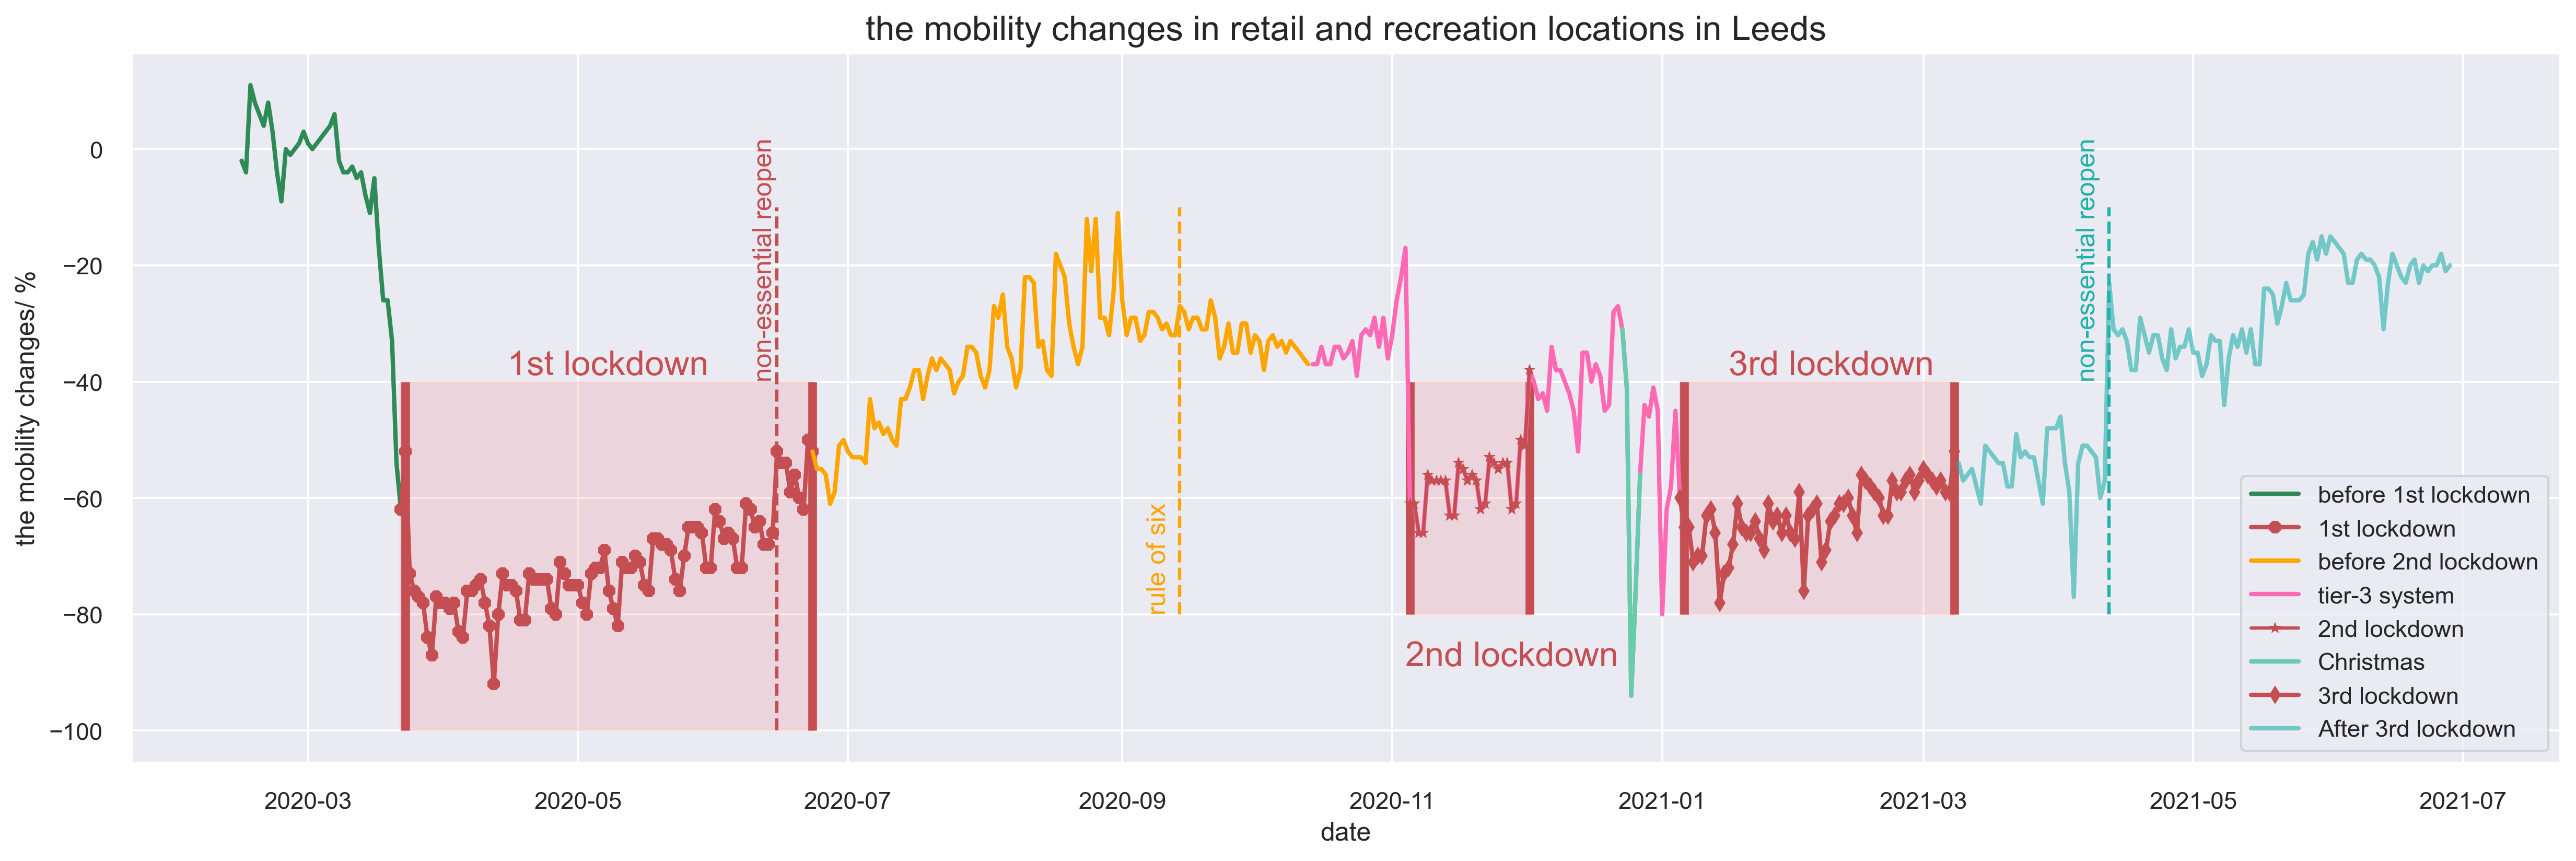

In [111]:
# plot
iv_l = -5
iv_u = 5

# set the figure size
plt.figure(figsize=(20,6),dpi=300)

# set the background style
sns.set()
#sns.palplot(sns.color_palette("hls", 10))
#sns.palplot(sns.color_palette("Paired",8))

# without policy
plt.plot(data_pre['date'],data_pre['retail_and_recreation_percent_change_from_baseline'],label='before 1st lockdown',
        c='seagreen',linewidth=2)

# 1st lockdown
plt.plot(data_1st['date'],data_1st['retail_and_recreation_percent_change_from_baseline'],'-8',label='1st lockdown',
         c='r',linewidth=2)


plt.plot(data_no_lock['date'],data_no_lock['retail_and_recreation_percent_change_from_baseline'],label='before 2nd lockdown',
        c='orange',linewidth=2)

plt.plot(tier3['date'],tier3['retail_and_recreation_percent_change_from_baseline'],label='tier-3 system',c='hotpink',linewidth=2)

# 2nd lockdown
plt.plot(data_2nd['date'],data_2nd['retail_and_recreation_percent_change_from_baseline'],'-*',label='2nd lockdown',
        c='r')


    
plt.plot(chris['date'],chris['retail_and_recreation_percent_change_from_baseline'],label='Christmas',c='mediumaquamarine',linewidth=2)

# 3rd lockdown
plt.plot(data_3rd['date'],data_3rd['retail_and_recreation_percent_change_from_baseline'],'-d',label='3rd lockdown',
        c='r',linewidth=2)



plt.plot(post_data['date'],post_data['retail_and_recreation_percent_change_from_baseline'],label='After 3rd lockdown',
         c='lightseagreen',linewidth=2, alpha=0.6)



## add decoration

# first lockdown
plt.vlines(dt.date(2020, 3, 23),-100,-40,colors='r',linewidth=4)
plt.vlines(dt.date(2020, 6, 23),-100,-40,colors='r',linewidth=4)


# reopen at the end of the 1st lockdown
plt.vlines(dt.date(2020, 6, 15),-100,-10,colors='r', linestyle='--')
plt.text(dt.date(2020, 6, 15), -40, 'non-essential reopen',rotation=90, ha='right', va='bottom', fontsize=12,color = 'r') 

# add text title for each lockdown period
plt.text(dt.date(2020, 4, 15), -40, '1st lockdown', va='bottom', fontsize=16,color = 'r')  
plt.text(dt.date(2020, 11, 4), -90, '2nd lockdown', va='bottom', fontsize=16,color = 'r')  
plt.text(dt.date(2021, 1, 16), -40, '3rd lockdown', va='bottom', fontsize=16,color = 'r')  

# 2nd lockdown
plt.vlines(dt.date(2020, 11, 5),-80,-40,colors='r',linewidth=4)
plt.vlines(dt.date(2020, 12, 2),-80,-40,colors='r',linewidth=4)

# rule of six imported
plt.vlines(dt.date(2020, 9, 14),-80,-10,colors='orange', linestyle='--')
plt.text(dt.date(2020, 9, 12), -80, 'rule of six',rotation=90, ha='right', va='bottom', fontsize=12,color = 'orange')  # horizontal alignment

# non-essential reopen
plt.vlines(dt.date(2021, 4, 12),-80,-10,colors='lightseagreen', linestyle='--')
plt.text(dt.date(2021, 4, 10), -40, 'non-essential reopen',rotation=90, ha='right', va='bottom', fontsize=12,color = 'lightseagreen')  # horizontal alignment

# 3rd lockdown
plt.vlines(dt.date(2021, 1, 6),-80,-40,colors='r',linewidth=4)
plt.vlines(dt.date(2021, 3, 8),-80,-40,colors='r',linewidth=4)
plt.legend()

# add shadow region of each period
plt.fill_between(data_1st['date'], -100, -40, alpha=0.2, color='lightcoral')
plt.fill_between(data_2nd['date'], -80, -40, alpha=0.2, color='lightcoral')
plt.fill_between(data_3rd['date'], -80, -40, alpha=0.2, color='lightcoral')

plt.xlabel('date')
plt.ylabel('the mobility changes/ %')
plt.title('the mobility changes in retail and recreation locations in Leeds',fontsize=16)

plt.savefig('the mobility changes in retail and recreation locations in Leeds')